In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classes.Learning_module_2d import LearningModule
import math


In [2]:

GP = LearningModule(3)
objective=10
dataset2 = np.load('C:/Users/mahdi/Desktop/MPC/MPCExperiments/datasetGP2.npy')

dataset1 =  np.load('C:/Users/mahdi/Desktop/MPC/MPCExperiments/datasetGP.npy')
GP.read_data_action(dataset1, objective)
GP.read_data_action2(dataset2,objective)


all_dataset_shape= (1190,)


a0_x: [[13.72171157]]
D_x: [0.54493189]
a0_y: [[17.18550816]]
D_y: [0.63725608]
a0_y: [[-17.18550816]]
D_y: [-0.63725608]


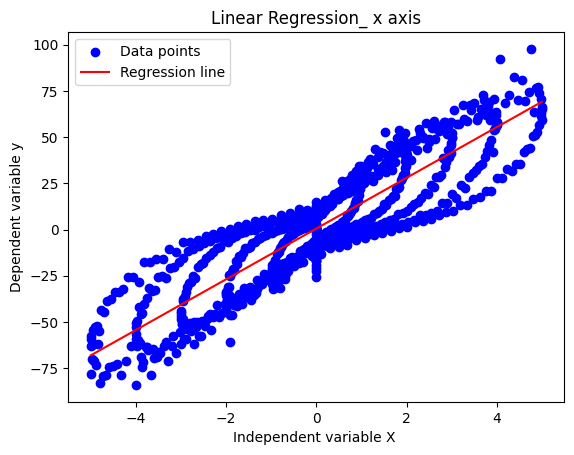

a0_y: [[-17.18550816]]
D_y: [-0.63725608]


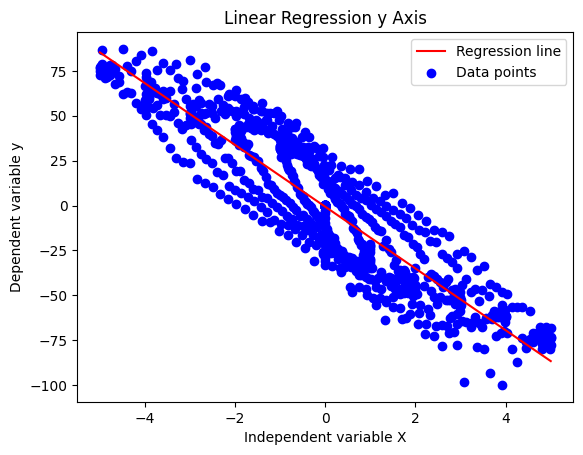

a0================= 15.453609862827811
a0_est= 15.453609862827811
GP Learning Complete!
r^2 are 0.9669444533680782 and 0.9639651041839775
Trainig completed


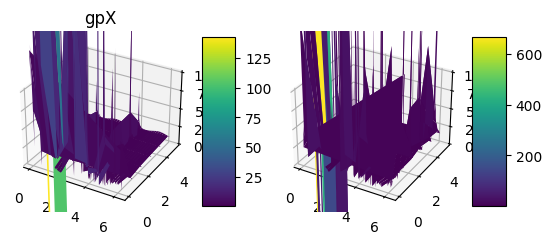

In [3]:
GP.estimate_a0(0)
# GP.load_GP('C:\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\only_open_loop')

c:\Users\mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


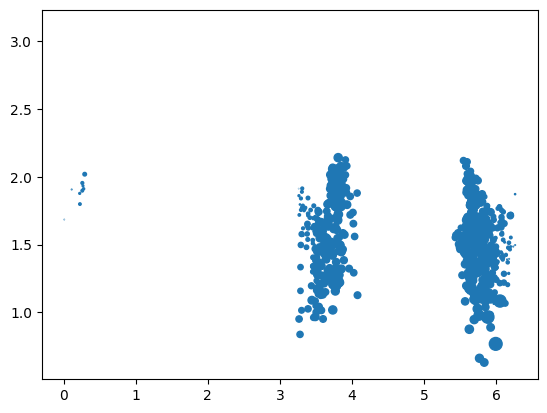

In [4]:
plt.scatter(GP.alpha_infinity, GP.freq_infinity, GP.vy_infinity)

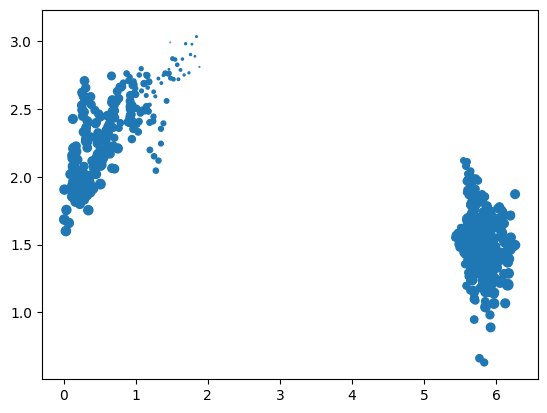

In [5]:
plt.scatter(GP.alpha_infinity, GP.freq_infinity, GP.vx_infinity)

In [6]:

def model_error(vx_ls, vy_ls, alpha_ls, freq_ls):
    plot = True
    ex_gp_ls = []
    ey_gp_ls = []
    ex_lm_ls = []
    ey_lm_ls = []
    sigX_ls = []
    sigY_ls = []
    vx_gp_ls, vy_gp_ls, vx_lm_ls, vy_lm_ls = [],[],[],[]
    for i in range(1,len(vx_ls)-1):
        v_gp,v_lm, sig = GP.dyn_model(alpha_ls[i],freq_ls[i])
        vx_gp, vy_gp , vx_lm, vy_lm = v_gp[0][0], v_gp[1][0], v_lm[0], v_lm[1]
        vx_gp_ls.append(vx_gp)
        vy_gp_ls.append(vy_gp)
        vx_lm_ls.append(vx_lm)
        vy_lm_ls.append(vy_lm)
        sigX_ls.append(sig[0])
        sigY_ls.append(sig[1])
        vx = vx_ls[i]
        vy = vy_ls[i]


        ex_gp = np.abs(vx-vx_gp)
        ey_gp = np.abs(vy-vy_gp)
        ex_lm = np.abs(vx-vx_lm)
        ey_lm = np.abs(vy-vy_lm)
        ex_gp_ls.append(ex_gp)
        ey_gp_ls.append(ey_gp)
        ex_lm_ls.append(ex_lm)
        ey_lm_ls.append(ey_lm)
    
    if plot:
        time = range(len(vx_gp_ls))
        fig, ax = plt.subplots(2, figsize=(10, 8))
        ax[0].fill_between(time,   (np.array(vx_gp_ls)+2*np.array(sigX_ls).flatten() ).flatten(),  (np.array(vx_gp_ls)-2*np.array(sigX_ls).flatten() ).flatten(), color = 'gray', alpha = 0.5, label= '2sigma bound')
        ax[0].fill_between(time,   (np.array(vx_gp_ls)+3*np.array(sigX_ls).flatten() ).flatten(),  (np.array(vx_gp_ls)+2*np.array(sigX_ls).flatten() ).flatten(), color = 'black', alpha = 0.5)
        ax[0].fill_between(time,   (np.array(vx_gp_ls)-2*np.array(sigX_ls).flatten() ).flatten(),  (np.array(vx_gp_ls)-3*np.array(sigX_ls).flatten() ).flatten(), color = 'black', alpha = 0.5,label= '3sigma bound')

        ax[0].plot(vx_lm_ls, color = 'red', label = 'linear Model')
        ax[0].plot(vx_ls, color = 'green', label ='Actual Data')
        ax[0].plot(vx_gp_ls, color = 'blue', label = 'GP')
        ax[0].set_title('Velocity X')
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Velocity X')
        ax[0].legend()
        


        ax[1].fill_between(time,   (np.array(vy_gp_ls)+2*np.array(sigY_ls).flatten() ).flatten(),  (np.array(vy_gp_ls)-2*np.array(sigY_ls).flatten() ).flatten(), color = 'gray', alpha = 0.5)
        ax[1].fill_between(time,   (np.array(vy_gp_ls)+3*np.array(sigY_ls).flatten() ).flatten(),  (np.array(vy_gp_ls)+2*np.array(sigY_ls).flatten() ).flatten(), color = 'black', alpha = 0.5)
        ax[1].fill_between(time,   (np.array(vy_gp_ls)-2*np.array(sigY_ls).flatten() ).flatten(),  (np.array(vy_gp_ls)-3*np.array(sigY_ls).flatten() ).flatten(), color = 'black', alpha = 0.5,label= '3sigma bound')

        ax[1].plot(vy_lm_ls, color = 'red', label = 'linear Model')
        ax[1].plot(vy_ls, color = 'green', label ='Actual Data')
        ax[1].plot(vy_gp_ls, color = 'blue', label = 'GP')
        ax[1].set_title('Velocity Y')
        ax[1].set_xlabel('Time')
        ax[1].set_ylabel('Velocity Y')
        # ax[1].legend()
                

        plt.show()
    else:
        return np.array(vx_gp_ls), np.array(vy_gp_ls), np.array(vx_lm_ls), np.array(vy_lm_ls), sigX_ls, sigY_ls


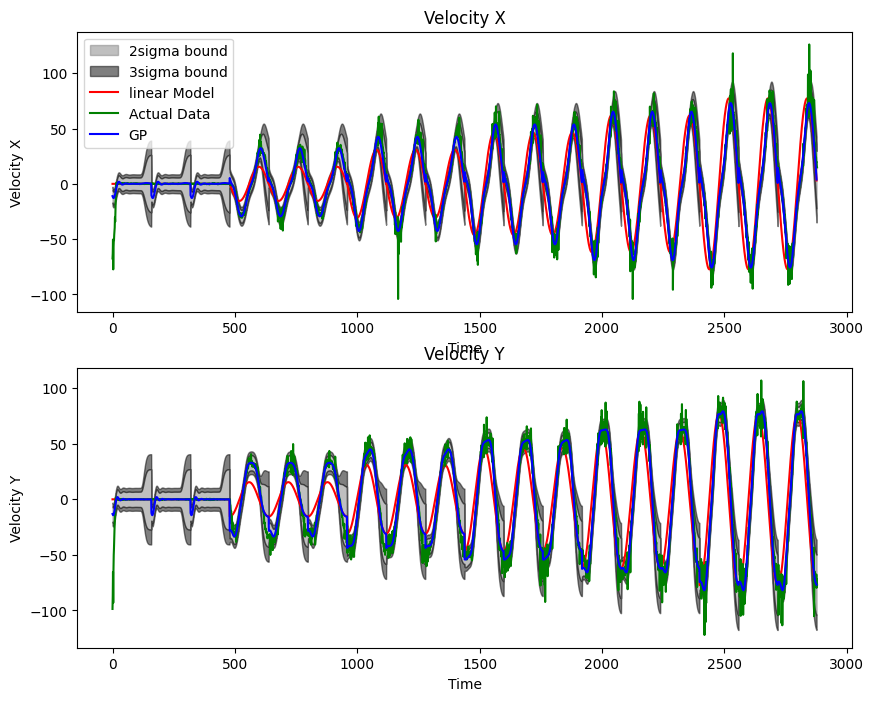

In [11]:
freq_read = dataset1[:,-1]
alpha_read = dataset1[:,-2]+np.pi/2
vx_read = dataset1[:,3]
vy_read = dataset1[:,4]
model_error( vx_read, vy_read, alpha_read, freq_read)


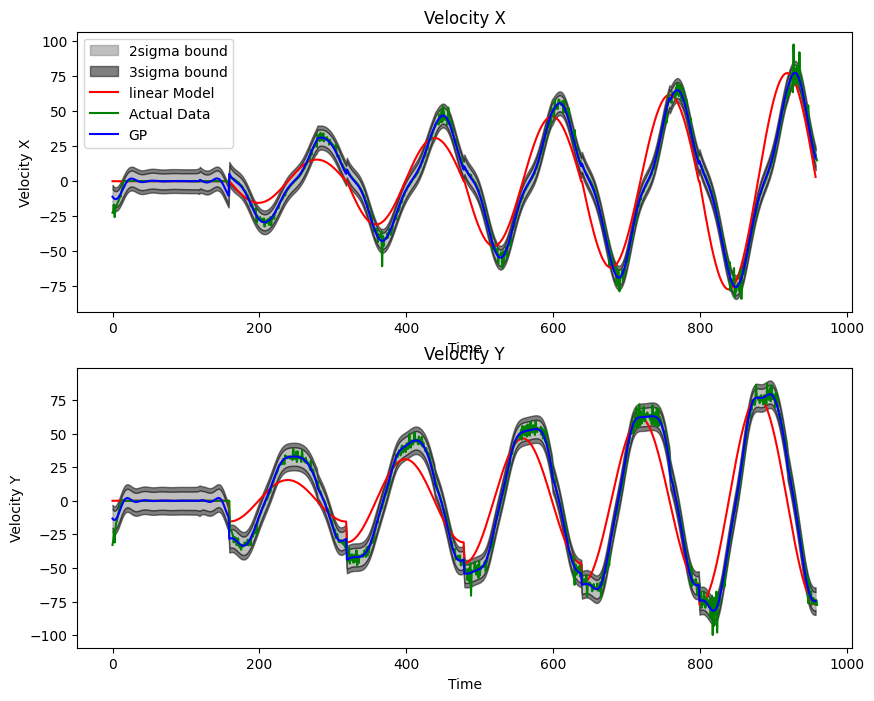

In [10]:
model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())
# vx_gp_ls1, vy_gp_ls1, vx_lm_ls1, vy_lm_ls1, sigx_1, sigy_1 = model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

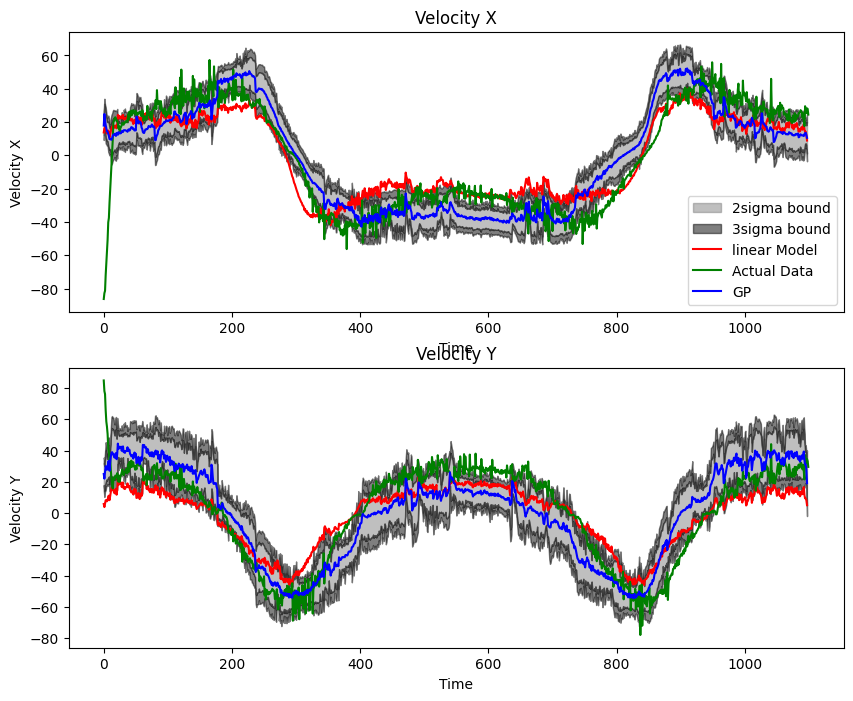

In [13]:
model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.normalize_angle(GP.alpha_infinity.flatten()), GP.freq_infinity.flatten())


In [24]:
# GP.estimate_a0(1)
###Using all the data
GP.load_GP('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\all_inifinty')

GP is loaded


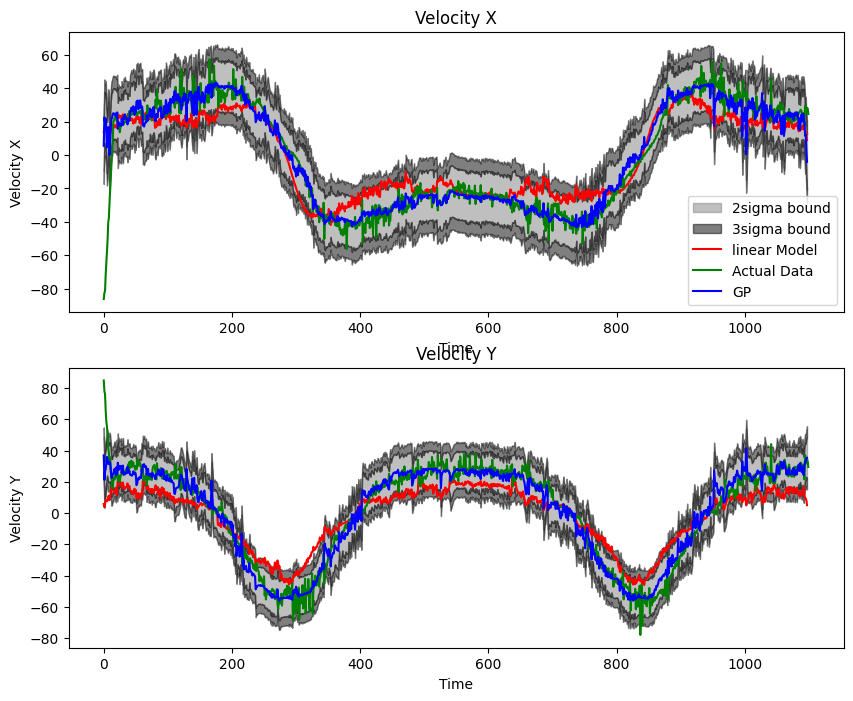

In [25]:
model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())

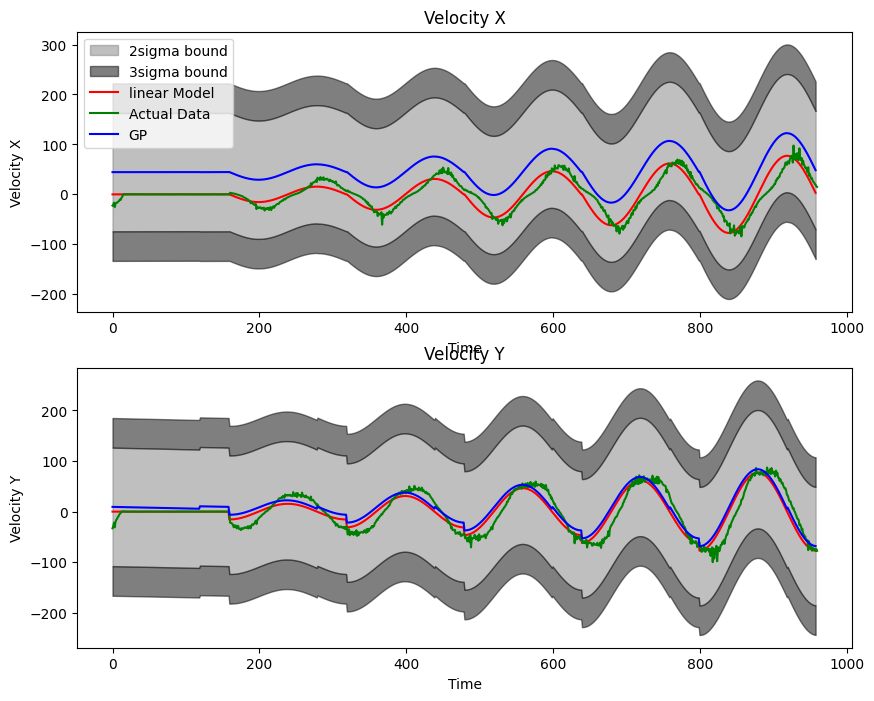

In [22]:
model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

In [14]:
GP.estimate_a0(2)
# GP.load('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\partial')

GP Learning Complete!
r^2 are 0.7326264001654177 and 0.8630021792640241


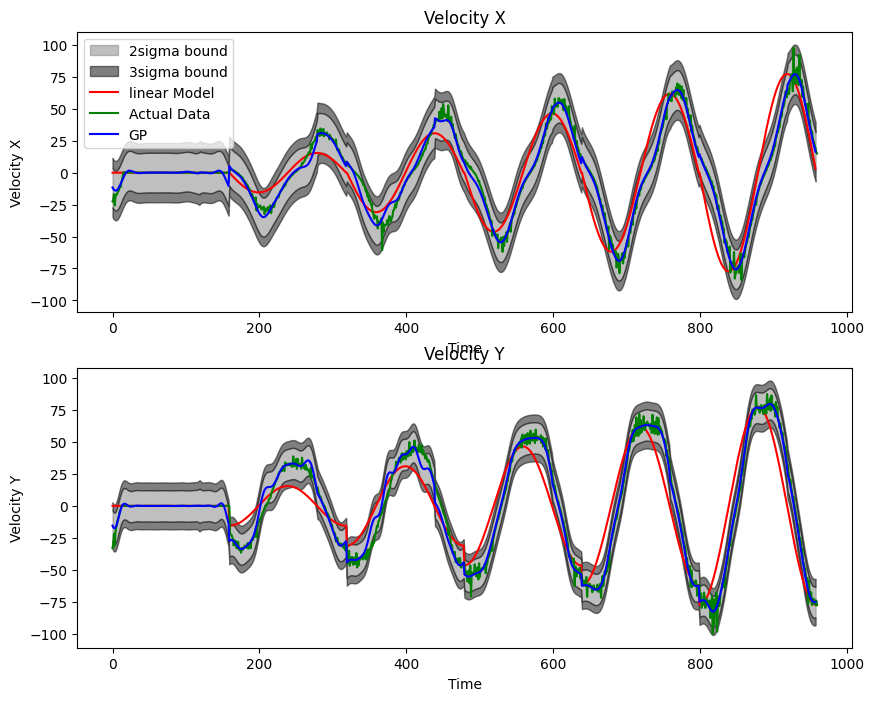

In [15]:
model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

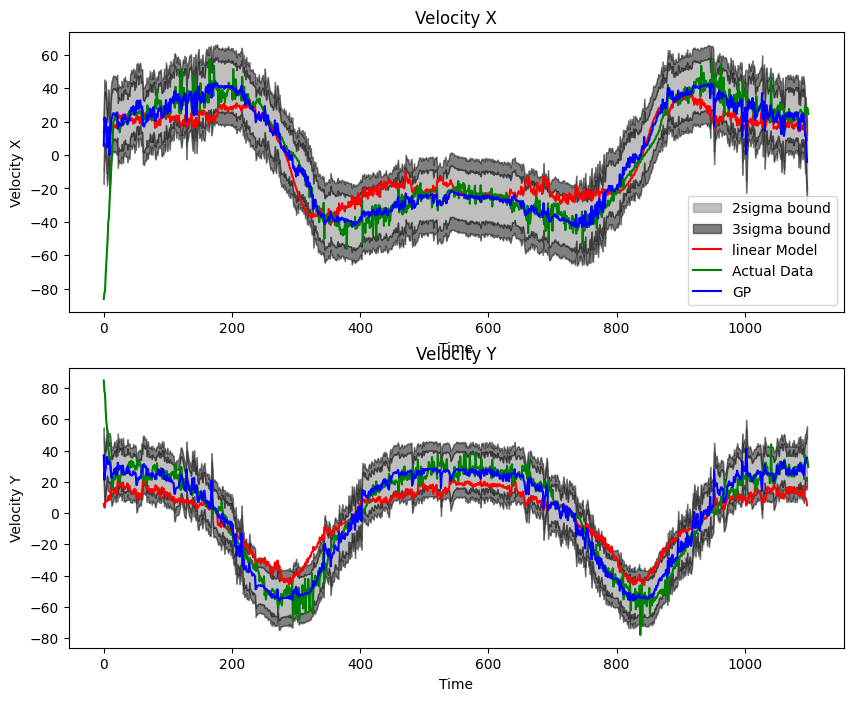

In [16]:
model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())

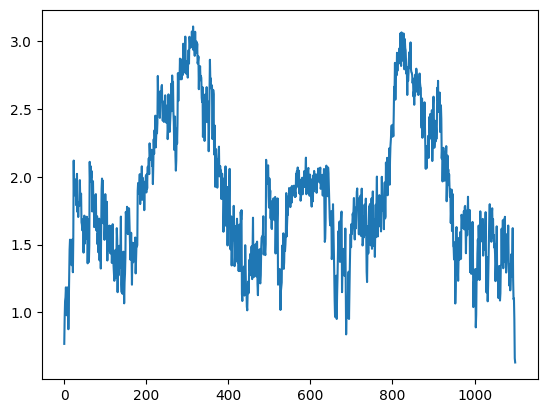

In [20]:
plt.plot(GP.freq_infinity)

In [17]:
GP.estimate_a0(3)
# GP.load('C:\\Users\\mahdi\\Desktop\\MPC\\MPCExperiments\\saved_model\\grouped')

c:\Users\mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 500.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GP Learning Complete!
r^2 are 0.22179169628556128 and 0.307226364460342


c:\Users\mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 500.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


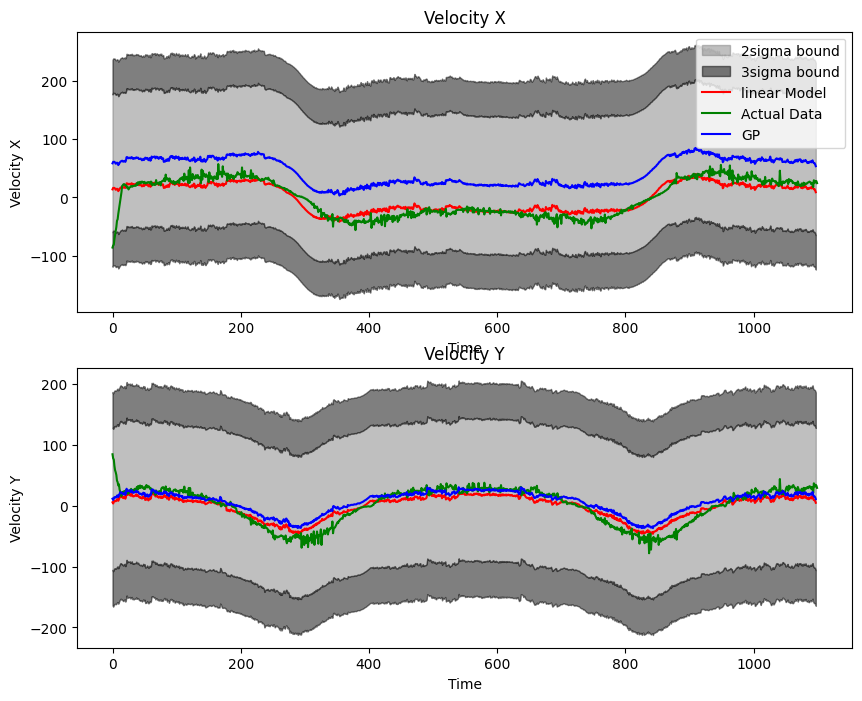

In [18]:
model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())

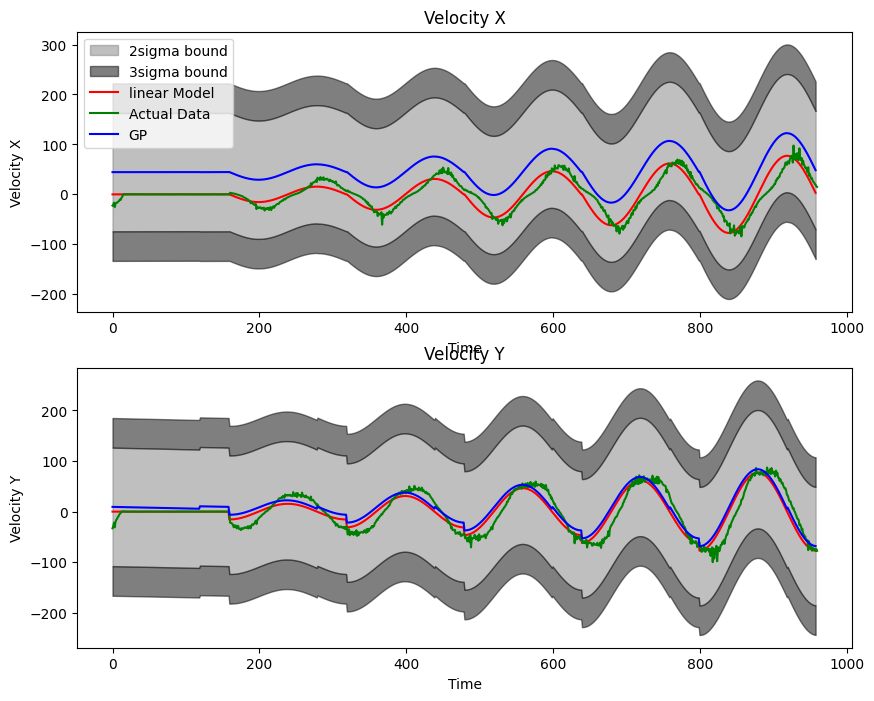

In [19]:
model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming your data is in a DataFrame called df
# # df = pd.read_csv('your_data.csv') # or however you load your data

# # Example data

# df = pd.DataFrame(data)

# # Define the bin size
# alpha_bin_size = 0.5
# freq_bin_size = 0.5

# # Create bins
# df['alpha_bin'] = (df['alpha'] / alpha_bin_size).astype(int)
# df['freq_bin'] = (df['freq'] / freq_bin_size).astype(int)

# # Group by the bins and calculate the mean vx for each group
# grouped = df.groupby(['alpha_bin', 'freq_bin']).agg({
#     'alpha': 'mean',
#     'freq': 'mean',
#     'vx': 'mean'
# }).reset_index()

# # Drop the bin columns
# grouped = grouped.drop(columns=['alpha_bin', 'freq_bin'])

# # Save or use the grouped data
# # grouped.to_csv('grouped_data.csv', index=False)

# # If you want to visualize the simplified data
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(grouped['alpha'], grouped['freq'], grouped['vx'], c='r', marker='o')

# ax.set_xlabel('Alpha')
# ax.set_ylabel('Freq')
# ax.set_zlabel('Vx')

# plt.show()
